<a href="https://colab.research.google.com/github/rpyakurel/rpyakurel.github.io/blob/main/women_entrepreneurship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Women Entrepreneurship and Labor Force Ananlysis**




---





In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing all the necessary libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px


##**The Data**

1. The Women Entrepreneurs and Labor Index dataset from Kaggle. It contains data from Organization for Economic Co-operation and Development (OECD) countries from 2015. It includes data about women’s participation in the workforce and their contribution to the entrepreneur index. 
2. A custom dataset directly from the Global Entrepreneurship Monitor website that has more factors in regards to entrepreneurial ventures such as a fear of failure rate, perception of opportunities, and the ratio of female to male new entrepreneurs. 



In [ ]:
first_set = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/womenent.csv', sep= ';')
second_set = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/gem.csv')


In [ ]:
#joining the two sets together and removing unnecessary columns 

merged_df = pd.merge(first_set, second_set, on= 'Country', how= 'left')
new_df = merged_df.drop(['No', 'code', 'year'], axis= 1)
new_df.head()


,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Perceived opportunities,Fear of failure rate *,Total early-stage Entrepreneurial Activity (TEA),Female/Male TEA,Female/Male Opportunity-Driven TEA
0,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1,NaN,NaN,NaN,NaN,NaN
1,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0,40.26,48.48,6.24,0.66,0.63
2,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5,51.43,39.30,13.14,0.58,1.04
3,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7,48.62,32.62,6.59,0.47,0.85
4,France,Developed,Member,Euro,68.8,67.3,0.00,60.6,NaN,NaN,NaN,NaN,NaN


###**High Level Data Exploration**





In [ ]:
new_df.shape

(51, 13)

In [ ]:
new_df.keys()

Index(['Country', 'Level of development', 'European Union Membership',
       'Currency', 'Women Entrepreneurship Index', 'Entrepreneurship Index',
       'Inflation rate', 'Female Labor Force Participation Rate',
       'Perceived opportunities', 'Fear of failure rate *',
       'Total early-stage Entrepreneurial Activity (TEA)', 'Female/Male TEA',
       'Female/Male Opportunity-Driven TEA'],
      dtype='object')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           51 non-null     object 
 1   Level of development                              51 non-null     object 
 2   European Union Membership                         51 non-null     object 
 3   Currency                                          51 non-null     object 
 4   Women Entrepreneurship Index                      51 non-null     float64
 5   Entrepreneurship Index                            51 non-null     float64
 6   Inflation rate                                    51 non-null     float64
 7   Female Labor Force Participation Rate             51 non-null     float64
 8   Perceived opportunities                           33 non-null     float64
 9   Fear of failure rate * 

In [ ]:
# Shortening and cleaning up column titles

new_df.rename(columns= {
    'Level of development': 'Level of dev', 'European Union Membership': 'EU member', 'Women Entrepreneurship Index': 'Female EI', 'Entrepreneurship Index': 'EI','Female Labor Force Participation Rate': 'Female labor rate', 'Fear of failure rate *': 'Fear of failure rate', 'Total early-stage Entrepreneurial Activity (TEA)':'TEA', 'Female/Male TEA': 'F/M TEA', 'Female/Male Opportunity-Driven TEA': 'F/M OD TEA'
    }, inplace= True)
new_df.head()




,Country,Level of dev,EU member,Currency,Female EI,EI,Inflation rate,Female labor rate,Perceived opportunities,Fear of failure rate,TEA,F/M TEA,F/M OD TEA
0,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1,NaN,NaN,NaN,NaN,NaN
1,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0,40.26,48.48,6.24,0.66,0.63
2,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5,51.43,39.30,13.14,0.58,1.04
3,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7,48.62,32.62,6.59,0.47,0.85
4,France,Developed,Member,Euro,68.8,67.3,0.00,60.6,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Counting null values 

new_df.isna().sum()

Country                     0
Level of dev                0
EU member                   0
Currency                    0
Female EI                   0
EI                          0
Inflation rate              0
Female labor rate           0
Perceived opportunities    18
Fear of failure rate       18
TEA                        18
F/M TEA                    18
F/M OD TEA                 18
dtype: int64

In [ ]:
new_df.describe()

,Female EI,EI,Inflation rate,Female labor rate,Perceived opportunities,Fear of failure rate,TEA,F/M TEA,F/M OD TEA
count,51.000000,51.000000,51.000000,51.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,47.835294,47.241176,2.587647,58.481765,39.719091,37.396970,10.899394,0.629697,0.936364
std,14.268480,16.193149,5.380639,13.864567,12.703889,8.016052,6.387674,0.222844,0.129006
min,25.300000,24.800000,-2.250000,13.000000,14.190000,23.070000,2.930000,0.320000,0.630000
25%,36.350000,31.900000,-0.500000,55.800000,30.220000,32.620000,6.750000,0.480000,0.880000
50%,44.500000,42.700000,0.600000,61.000000,40.260000,38.600000,9.210000,0.540000,0.940000
75%,59.150000,65.400000,3.600000,67.400000,48.360000,42.290000,13.140000,0.790000,0.990000
max,74.800000,77.600000,26.500000,82.300000,70.220000,57.460000,33.560000,1.160000,1.170000


In [ ]:
# filling null values 
# using only the mean or median significantly changed the standard deviation and the 25th and the 75th quartile.
#so we are using INTERPOLATE(), then using MEAN() to fill in the remaining value.

updated_df = new_df.fillna(new_df.interpolate())
updated_df = updated_df.fillna(updated_df.mean())

In [ ]:
updated_df.isna().sum()

Country                    0
Level of dev               0
EU member                  0
Currency                   0
Female EI                  0
EI                         0
Inflation rate             0
Female labor rate          0
Perceived opportunities    0
Fear of failure rate       0
TEA                        0
F/M TEA                    0
F/M OD TEA                 0
dtype: int64

In [ ]:
updated_df.describe()

,Female EI,EI,Inflation rate,Female labor rate,Perceived opportunities,Fear of failure rate,TEA,F/M TEA,F/M OD TEA
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,47.835294,47.241176,2.587647,58.481765,40.949100,36.860200,11.266200,0.645400,0.933500
std,14.268480,16.193149,5.380639,13.864567,11.512058,6.628799,6.017633,0.220579,0.119237
min,25.300000,24.800000,-2.250000,13.000000,14.190000,23.070000,2.930000,0.320000,0.630000
25%,36.350000,31.900000,-0.500000,55.800000,33.748333,32.963333,7.185000,0.498333,0.871667
50%,44.500000,42.700000,0.600000,61.000000,41.790000,36.450000,9.640000,0.580000,0.935000
75%,59.150000,65.400000,3.600000,67.400000,47.208333,40.105000,13.440000,0.800000,1.007500
max,74.800000,77.600000,26.500000,82.300000,70.220000,57.460000,33.560000,1.160000,1.170000


In [ ]:
# separating developed and developing countries into two separate dfs

non_dev_countries = updated_df.iloc[(updated_df['Level of dev'] == 'Developing').values]
dev_countries = updated_df.iloc[(updated_df['Level of dev'] == 'Developed').values]

###**Sorting countries by women entrepreneurship index.**
*Then looking at the top and bottom 5 countries to see if there are any commanlities in which to delve further.* 


---



In [ ]:
x= updated_df.sort_values(by=['Female EI'], ascending= False)
x.head()

,Country,Level of dev,EU member,Currency,Female EI,EI,Inflation rate,Female labor rate,Perceived opportunities,Fear of failure rate,TEA,F/M TEA,F/M OD TEA
20,Australia,Developed,Not Member,National Currency,74.8,77.6,1.5,66.8,48.870000,41.670000,12.790000,0.650000,0.940
16,Denmark,Developed,Member,National Currency,69.7,71.4,0.5,70.3,23.820000,38.120000,7.805000,0.560000,0.805
11,Netherlands,Developed,Member,Euro,69.3,66.5,0.6,69.2,48.360000,33.170000,7.210000,0.320000,1.170
4,France,Developed,Member,Euro,68.8,67.3,0.0,60.6,43.445000,37.455000,5.645000,0.505000,0.885
21,Iceland,Developed,Not Member,National Currency,68.0,70.4,1.6,82.3,55.556667,38.916667,10.413333,0.603333,0.990


In [ ]:
x.tail()

,Country,Level of dev,EU member,Currency,Female EI,EI,Inflation rate,Female labor rate,Perceived opportunities,Fear of failure rate,TEA,F/M TEA,F/M OD TEA
29,Bolivia,Developing,Not Member,National Currency,29.7,28.0,4.1,69.4,44.713333,32.113333,18.820000,0.840000,0.776667
35,Egypt,Developing,Not Member,National Currency,27.7,28.1,11.0,64.6,46.070000,29.500000,7.390000,0.330000,0.730000
27,Algeria,Developing,Not Member,National Currency,27.4,30.2,4.8,18.0,38.050000,34.795000,12.520000,0.645000,0.870000
37,Ghana,Developing,Not Member,National Currency,25.8,24.8,17.2,60.8,40.550000,39.173333,9.683333,0.496667,0.956667
38,India,Developing,Not Member,National Currency,25.3,25.3,5.9,61.1,37.790000,44.010000,10.830000,0.580000,1.070000


From the data snippet above, there does not seem to be too many commonalities in the top and bottom five countries, other than level of development. \
For example, India has the lowest female entrepreneurial index and a fairly low inflation rate. 
So, we will go ahead and move on to isolating some factors and looking into potential correlations. 

In [ ]:
updated_df.value_counts(['EU member'])

EU member 
Not Member    31
Member        20
dtype: int64

In [ ]:
updated_df.value_counts(['Level of dev'])

Level of dev
Developed       27
Developing      24
dtype: int64

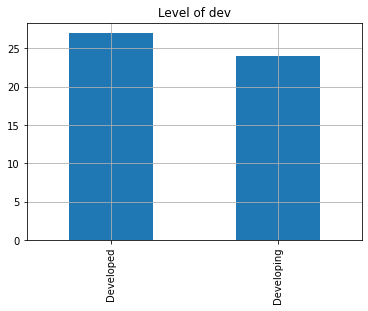

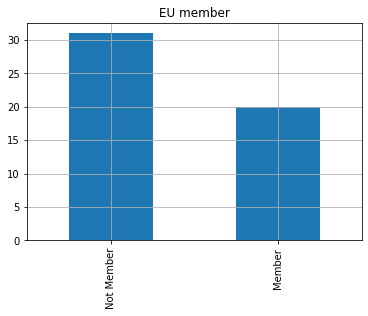

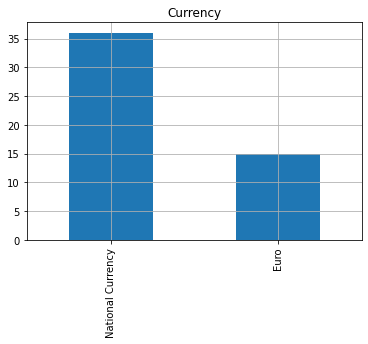

In [ ]:
# looking at the breakdown of categorical data

categorical_data = ['Level of dev', 'EU member', 'Currency']

for val in categorical_data:
  updated_df[val].value_counts().plot(kind= 'bar')
  plt.title(val)
  plt.grid()
  plt.show()

###Checking for significant difference between the following in developed vs. developing countries:
*1. Female labor participation*\
*2.Female entrepreneurial index*






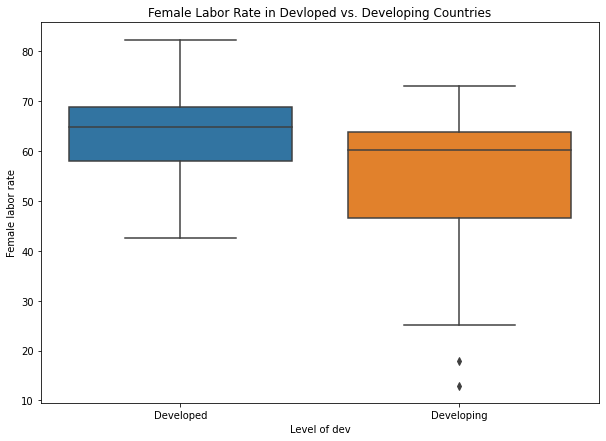

In [ ]:
plt.figure(figsize=(10,7))
figure1 = sns.boxplot(y= 'Female labor rate', x= 'Level of dev', data= updated_df ).set_title('Female Labor Rate in Devloped vs. Developing Countries')


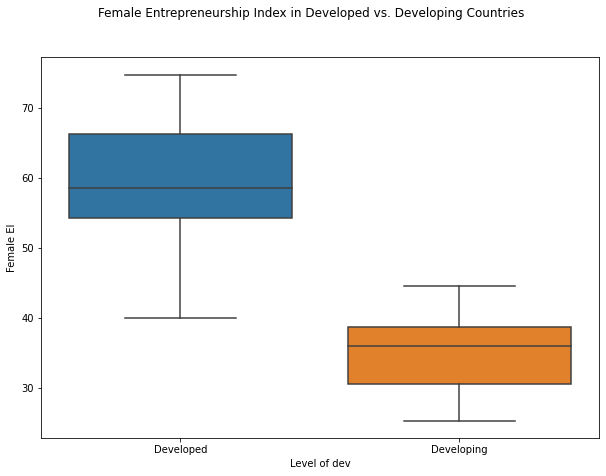

In [ ]:
plt.figure(figsize=(10,7))
figure2 = sns.boxplot(y= 'Female EI', x= 'Level of dev', data= updated_df, )
plt.suptitle('Female Entrepreneurship Index in Developed vs. Developing Countries')
plt.show(figure2)

In [ ]:
stats.ttest_ind(dev_countries['Female labor rate'], non_dev_countries['Female labor rate'])

Ttest_indResult(statistic=2.6707743023877413, pvalue=0.010241078946722557)

In [ ]:
stats.ttest_ind(dev_countries['Female EI'], non_dev_countries['Female EI'])

Ttest_indResult(statistic=12.076566656391318, pvalue=2.674295611546847e-16)

From the visualizations and the T-tests above, it looks like there is a significant difference between both female participation rate and female entrepreneurial index in developed and developing countries.


That may mean there is some opportunities for both female entreprenuers and business investors to close the gap in the market in developing nations.
On the other hand there may be less opportunities to do so. Which we will look at further down.



---





### Checking whether there is a significant difference between EU members and both developed non members and developing members in female entrepreneurial rates. 

In [ ]:
eu_members = updated_df.iloc[(updated_df['EU member'] == 'Member').values]
non_members = updated_df.iloc[(updated_df['EU member']!= 'Member').values]

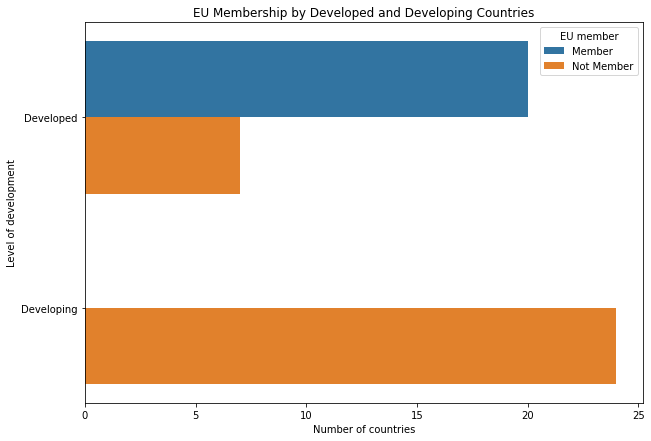

In [ ]:
plt.figure(figsize=(10,7))
figure3 = sns.countplot(y= 'Level of dev', hue = 'EU member', data = updated_df)
plt.xlabel('Number of countries')
plt.ylabel('Level of development')
plt.title('EU Membership by Developed and Developing Countries')
plt.show(figure3)

<Figure size 720x504 with 0 Axes>

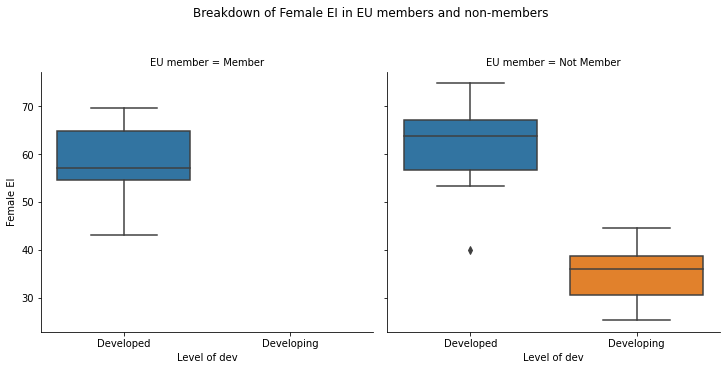

In [ ]:
plt.figure(figsize=(10,7))
figure4 = sns.catplot(y= 'Female EI', x= 'Level of dev', col= 'EU member', kind= 'box', data= updated_df)
plt.subplots_adjust(top=0.8)
plt.suptitle('Breakdown of Female EI in EU members and non-members')
plt.show(figure4)

In [ ]:
stats.ttest_ind(eu_members['Female EI'], non_members['Female EI'])

Ttest_indResult(statistic=5.609944770084068, pvalue=9.282369170679536e-07)

In [ ]:
#checking values of outlying data points 

dev_countries.iloc[(dev_countries['Female EI'] == dev_countries['Female EI'].min()).values]

,Country,Level of dev,EU member,Currency,Female EI,EI,Inflation rate,Female labor rate,Perceived opportunities,Fear of failure rate,TEA,F/M TEA,F/M OD TEA
22,Japan,Developed,Not Member,National Currency,40.0,49.5,0.8,64.7,62.243333,36.163333,8.036667,0.556667,1.04


The graphs above show that there aren't any developing countries that are EU members. But there are non-member developed countries.
The p-value comparing the female entrepreneurship index between EU members and non-members is quite small so it is satistically significant. \
\
So women in EU nations or developed non-member nations are more likely to own businesses. So these options may be a safer bet for business investors. 




---






###Checking the correlation between the inflation rate of a country and:

*1. Female Entrepreneurial Index*\
*2. Female Labor Participation Rate*

In [ ]:
figure5 = px.scatter(updated_df, x= 'Female EI', y= 'Inflation rate', trendline= 'ols', title='Relationship between Inflation Rate and Female Entrepreneurial Index', width= 800, height= 600)
figure5.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Correlation between inflation and Female labor rate 

updated_df['Female EI'].corr(updated_df['Inflation rate'])

-0.45553237798193397

In [ ]:
figure6 = px.scatter(updated_df, x= 'Female labor rate', y='Inflation rate', trendline='ols', title= 'Relationship between Inflation Rate and Female Labor rate', width=800, height=600)
figure6.show()

In [ ]:
updated_df['Female labor rate'].corr(updated_df['Inflation rate'])

-0.1398023707942315

In [ ]:
updated_df['Female labor rate'].corr(updated_df['Female EI'])

0.4413724223368962

<Figure size 720x504 with 0 Axes>

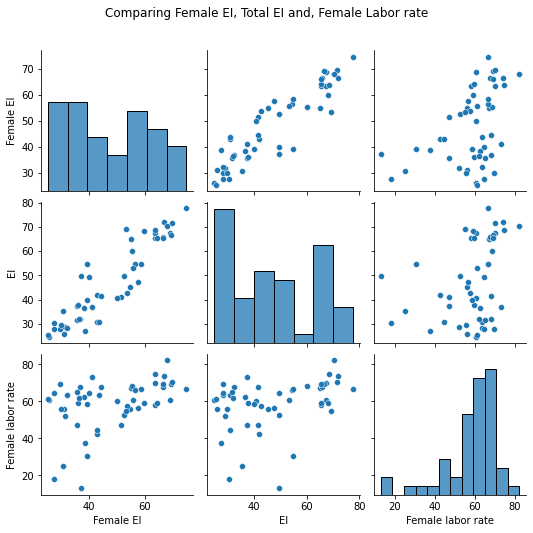

In [ ]:
plt.figure(figsize=(10,7))
figure7 = sns.pairplot(updated_df, vars=['Female EI', 'EI', 'Female labor rate'])
plt.subplots_adjust(top=0.9)
plt.suptitle('Comparing Female EI, Total EI and, Female Labor rate')
plt.show(figure7)


In [ ]:
updated_df.iloc[(updated_df['Inflation rate'] == 26.5).values]

From the calculations above, it shows that the relationship between inflation rate of a country and both female labor rate and female entrepreneurial index is inverse. 

For inflation rate and female entrepreneurial index the correlation is -0.455.
For inflation rate and female labor participation rate it is -0.139. 
These numbers show that there is a less notable negative correlation between the variables.\
\
From the pairplot, it can be seen that countries with high Female labor participation rates have high Female entrepreneurial index.\
\
Although, as an outlying data point, Argentina, has the highest inflation rate, even though it's female labor rate and female entrepreneurial index is not too far from the mean. \
\
Here, it can be interpreted that a stronger participation of women in entreprenership does not affect a nation's inflation rate a lot.
But for investors and women wanting to start a business, it can also mean that they will not be  impacted severely if a nation's inflation rate fluctuates. 


---





### Checking whether or not even in countries with low perceived rate of failure, the female entrepreneurial index is low. 

In [ ]:
stats.pearsonr(updated_df['Fear of failure rate'], updated_df['Female EI'])

In [ ]:
plt.figure(figsize=(10,7))
figure8 = sns.scatterplot(x= 'Fear of failure rate', y= 'Female EI', hue='Level of dev', data= updated_df)
plt.suptitle('Relationship between Fear of Failure and Female Entrepreneurial Index in Developed vs. Developing Countries')
plt.subplots_adjust(top=0.9)
plt.show(figure8)

Contrary to the initial assumption, it looks as as though there is not a significant relationship between fear of failure and female entrepreneurial index. This means that for any stakeholders, their investements will not be affected by fear of failure rates of a country. \
\
In developed countries, even with higher perceived fear of failure rates, women are more likely participate in entrepreneurial activities. This may be the case because there is a higher rate of participation in developed contries so a bussiness will be subject to higher amounts of competition which then raises the fear of failure.

Whereas, in developing countries, the market size may be smaller so the competition is not as high and fear of failure is lower for women owned businesses. Which may mean there is a bigger window of opportunity for aspiring women entreprenuers to close the gap in the market. 



---



### Checking whether participation in entrepreneurship is low for women even when there is a high TEA( Total early-stage Entrepreneurial Activity)

In [ ]:
stats.pearsonr(updated_df['Female EI'], updated_df['TEA'])

In [ ]:
stats.pearsonr(updated_df['F/M TEA'], updated_df['TEA'])

In [ ]:
plt.figure(figsize=(10,7))
figure9 = sns.scatterplot(x= 'TEA', y= 'Female EI', hue= 'Level of dev', data= updated_df)
plt.suptitle('Total Early Stage Entreprenurial Activity and Female Entrepreneurial Index in Developed vs. Developing Countries')
plt.show(figure9)

The correlation between female entrepreneurial index and total early stage activity is -0.461, which suggests a not so strong negative correlation between the two variables. And the p-value is small enough to be statistically significant. \
\
The scatterplot shows that even with low total early stage activity, female EI is higher in developed countries, so more women are starting entrepreneurial ventures. This does not seem like the case in developing nations.\
\
So, for a female entrepreneur there may be more opportunities in developing countries. And for investors, there may be more options in developed nations.



---



### The ratio of female to male entrepreneurs who claim to be driven by opportunity is higher in developed countries.

In [ ]:
plt.figure(figsize=(10,7))
figure10 = sns.catplot(y= 'F/M OD TEA', x= 'Level of dev', kind= 'box', data= updated_df)
plt.suptitle('Female to Male Opportunity Driven TEA in Developed vs. Developing Countries')
plt.subplots_adjust(top=0.9)
plt.show(figure10)

In [ ]:
stats.ttest_ind(dev_countries['F/M OD TEA'], non_dev_countries['F/M OD TEA'])

In [ ]:
updated_df['F/M OD TEA'].corr(updated_df['Perceived opportunities'])

In [ ]:
stats.ttest_ind(dev_countries['Perceived opportunities'], non_dev_countries['Perceived opportunities'])

From the calculations above it looks as though, there is higher female to male oppportunity driven early stage activity in developed nations. But from the t-test the difference does not seem statistically significant. 

And in a positive light there does not seem to be a significant difference in percieved opportunities between developed and developing countries. 


---




## Conclusions##

1. Level of development and EU membership have very strong effects on entrepreneurial index.
2. Inflation rate of a country does not have a huge effect on female participation.
3. In countries that already have established female business ventures, fear of failure does not seem to dissuade new businesses.
4. Developing countries are behind on both new and established female owned businesses. 



---



## Reccomendations##



1.   For both business investors and female entrepreneurs, developed countries are the safest ber for starting new businesses. 
2.   For women entrepreneurs in developing countries, it may be easier to start a business and have it succeed as there is low participation and thus less competiton.
3. And for investors, there may be more options in developed nations when looking for investment opportunities. 



---


